In [47]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [77]:
adult=pd.read_csv("adult.csv") 
adult.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [83]:
adult.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [92]:
for i in adult:
    if adult[i].dtype==int:
        max = adult[i].max()
        min = adult[i].min()
        adult[i] = (adult[i] - min) /(max - min)
    if adult[i].dtype==object:
        dict = {}
        j=1
        for k in adult[i].unique():
            dict[k] = j
            j+=1
        temp=[]
        for k in adult[i]:
            temp.append(dict[k])

        adult[i] = pd.Series(temp)
        max = adult[i].max()
        min = adult[i].min()
        adult[i] = (adult[i] - min) /(max - min)

In [93]:
adult.head()

age  workclass    fnlwgt  education  educational-num  marital-status  \
0  0.109589      0.000  0.145129   0.000000         0.400000        0.000000   
1  0.287671      0.000  0.052451   0.066667         0.533333        0.166667   
2  0.150685      0.125  0.219649   0.133333         0.733333        0.166667   
3  0.369863      0.000  0.100153   0.200000         0.600000        0.166667   
4  0.013699      0.250  0.061708   0.200000         0.600000        0.000000   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0    0.000000           0.0  0.00     0.0      0.000000           0.0   
1    0.071429           0.2  0.25     0.0      0.000000           0.0   
2    0.142857           0.2  0.25     0.0      0.000000           0.0   
3    0.000000           0.2  0.00     0.0      0.076881           0.0   
4    0.214286           0.0  0.25     1.0      0.000000           0.0   

   hours-per-week  native-country  income  
0        0.397959             0.0     0.0  
1        0.500000             0.0     0.0  
2        0.397959             0.0     1.0  
3        0.397959             0.0     1.0  
4        0.295918             0.0     0.0

In [94]:
adult.corr()

age  workclass    fnlwgt  education  educational-num  \
age              1.000000   0.175448 -0.076628   0.083128         0.030940   
workclass        0.175448   1.000000 -0.045334   0.054431         0.134462   
fnlwgt          -0.076628  -0.045334  1.000000   0.004889        -0.038761   
education        0.083128   0.054431  0.004889   1.000000         0.256100   
educational-num  0.030940   0.134462 -0.038761   0.256100         1.000000   
marital-status   0.340660   0.022773 -0.016426  -0.011891        -0.037273   
occupation      -0.020589  -0.066940  0.016753  -0.020108         0.058223   
relationship     0.122638  -0.027583  0.002615   0.020346        -0.010374   
race            -0.013759   0.015036 -0.128775   0.042265         0.034786   
gender          -0.088120  -0.069786 -0.027739  -0.030555        -0.009328   
capital-gain     0.077229   0.066441 -0.003706   0.056679         0.125146   
capital-loss     0.056944   0.031679 -0.004366   0.035468         0.080972   
hours-per-week   0.071558   0.071395 -0.013519   0.057752         0.143689   
native-country   0.018898  -0.006675  0.020751   0.075134        -0.022714   
income           0.230369   0.117061 -0.006339   0.160178         0.332613   

                 marital-status  occupation  relationship      race    gender  \
age                    0.340660   -0.020589      0.122638 -0.013759 -0.088120   
workclass              0.022773   -0.066940     -0.027583  0.015036 -0.069786   
fnlwgt                -0.016426    0.016753      0.002615 -0.128775 -0.027739   
education             -0.011891   -0.020108      0.020346  0.042265 -0.030555   
educational-num       -0.037273    0.058223     -0.010374  0.034786 -0.009328   
marital-status         1.000000   -0.013040      0.284348 -0.015249  0.153760   
occupation            -0.013040    1.000000     -0.026309  0.006670 -0.046287   
relationship           0.284348   -0.026309      1.000000 -0.020644  0.391131   
race                  -0.015249    0.006670     -0.020644  1.000000 -0.053702   
gender                 0.153760   -0.046287      0.391131 -0.053702  1.000000   
capital-gain           0.008431    0.010788     -0.009970  0.011933 -0.047094   
capital-loss           0.002681    0.015520     -0.009780  0.004471 -0.045480   
hours-per-week         0.070024    0.056997     -0.002686  0.021727 -0.228560   
native-country         0.017458   -0.027430      0.055040  0.125901  0.001284   
income                -0.003602    0.065845     -0.060166  0.032272 -0.214628   

                 capital-gain  capital-loss  hours-per-week  native-country  \
age                  0.077229      0.056944        0.071558        0.018898   
workclass            0.066441      0.031679        0.071395       -0.006675   
fnlwgt              -0.003706     -0.004366       -0.013519        0.020751   
education            0.056679      0.035468        0.057752        0.075134   
educational-num      0.125146      0.080972        0.143689       -0.022714   
marital-status       0.008431      0.002681        0.070024        0.017458   
occupation           0.010788      0.015520        0.056997       -0.027430   
relationship        -0.009970     -0.009780       -0.002686        0.055040   
race                 0.011933      0.004471        0.021727        0.125901   
gender              -0.047094     -0.045480       -0.228560        0.001284   
capital-gain         1.000000     -0.031441        0.082157       -0.005823   
capital-loss        -0.031441      1.000000        0.054467        0.000008   
hours-per-week       0.082157      0.054467        1.000000       -0.002617   
native-country      -0.005823      0.000008       -0.002617        1.000000   
income               0.223013      0.147554        0.227687       -0.003138   

                   income  
age              0.230369  
workclass        0.117061  
fnlwgt          -0.006339  
education        0.160178  
educational-num  0.332613  
marital-status  -0.003602  
occupation     

In [95]:
adult.describe()

age     workclass        fnlwgt     education  \
count  48842.000000  48842.000000  48842.000000  48842.000000   
mean       0.296487      0.118622      0.120004      0.272894   
std        0.187815      0.211807      0.071445      0.229301   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.150685      0.000000      0.071216      0.066667   
50%        0.273973      0.000000      0.112210      0.200000   
75%        0.424658      0.125000      0.152462      0.466667   
max        1.000000      1.000000      1.000000      1.000000   

       educational-num  marital-status    occupation  relationship  \
count     48842.000000    48842.000000  48842.000000  48842.000000   
mean          0.605206        0.186984      0.458028      0.315757   
std           0.171398        0.196924      0.235067      0.238367   
min           0.000000        0.000000      0.000000      0.000000   
25%           0.533333        0.000000      0.285714      0.200000   
50%           0.600000        0.166667      0.428571      0.200000   
75%           0.733333        0.166667      0.571429      0.400000   
max           1.000000        1.000000      1.000000      1.000000   

               race        gender  capital-gain  capital-loss  hours-per-week  \
count  48842.000000  48842.000000  48842.000000  48842.000000    48842.000000   
mean       0.245168      0.331518      0.010791      0.020088        0.402269   
std        0.124124      0.470764      0.074521      0.092517        0.126443   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.250000      0.000000      0.000000      0.000000        0.397959   
50%        0.250000      0.000000      0.000000      0.000000        0.397959   
75%        0.250000      1.000000      0.000000      0.000000        0.448980   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

       native-country        income  
count    48842.000000  48842.000000  
mean         0.030724      0.239282  
std          0.123126      0.426649  
min          0.000000      0.000000  
25%          0.000000      0.000000  
50%          0.000000      0.000000  
75%          0.000000      0.000000  
max          1.000000      1.000000

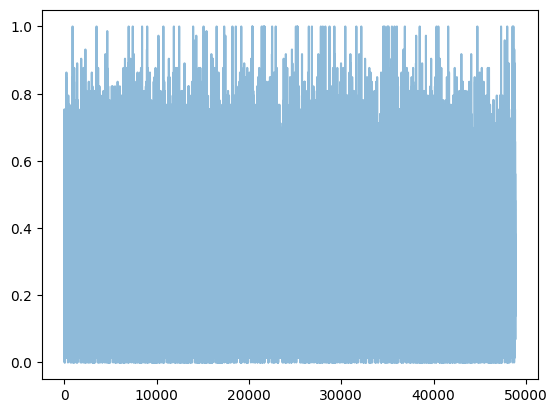

In [98]:
x = adult['age']
y = adult['income']
temp=np.array([[x[i],y[i]] for i in range(len(x))])

plt.plot(x, alpha=0.5)
plt.show()

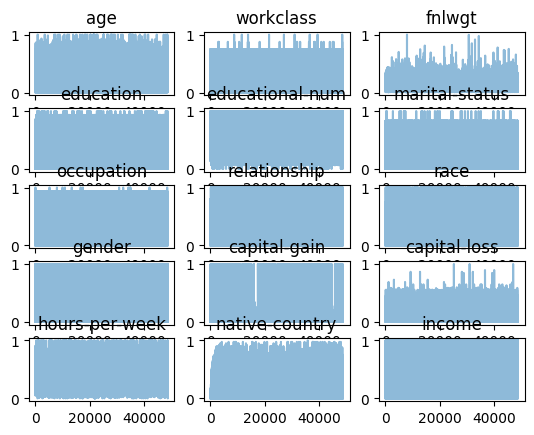

In [100]:
fig, axs = plt.subplots(5,3)
j=0
k=0
y = adult['income']
for i in adult:
    x = adult[i]
    axs[j][k].scatter(x, alpha=0.5)
    axs[j][k].set_title(i)
    k+=1
    if k%3==0:
        j+=1
        k=0